In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# California House Price Prediction

This dataset includes housing data from 1990. We use the CRISP-DM methods for this project.

**Step 1 (Business Understanding)**

Our goal for this project is to predict housing prices in California based on the data we have already collected. We want to predict what a house would cost based on several attributes like number of bedrooms, location, housing value etc. This is a linear regression problem.

**Step 2 (Data Understanding)**

In [213]:
#First we import all the necessary libraries for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [214]:
housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
housing.head(15)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY

**Step 3 (Data Preparation)**

In [215]:
#We check to see which columns have how many null values present in them
num_of_rows = housing.shape[0]
print("The total number of rows are: ", num_of_rows)
null_values = housing.isnull().sum()
print(null_values)

The total number of rows are:  20640
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [216]:
#Next, we fill in the null values with the mean value of that column.
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)
new_null_values = housing.isnull().sum()
print(new_null_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [217]:
#Now, we check for duplicate values
duplicate_rows = housing[housing.duplicated()]
print(f"The dataset has {len(duplicate_rows)} duplicate rows")

The dataset has 0 duplicate rows


In [218]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [219]:
#We also need to convert the ocean proximity values to binary values
housing['ocean_proximity'] = housing['ocean_proximity'].replace({'ISLAND': 4, 'NEAR OCEAN': 3, 'NEAR BAY': 2, '<1H OCEAN': 1, 'INLAND':0})
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                2  
1      2401.0      1138.0         8.3014            358500.0                2  
2       496.0       177.0         7.2574            352100.0                2  
3       558.0       219.0         5.6431            341300.0                2  
4       565.0       259.0         3.8462            342200.0                2

In [220]:
#We also need to identify and remove any outliers from the dataset to improve our model's accuracy
z_scores = np.abs(stats.zscore(housing))
#setting a threshold for outlier detection
threshold = 4.0
outliers = np.where(z_scores > threshold)

In [221]:
#Now that we have identified the outlier rows, we can remove them
clean_housing = housing.drop(outliers[0], axis=0)

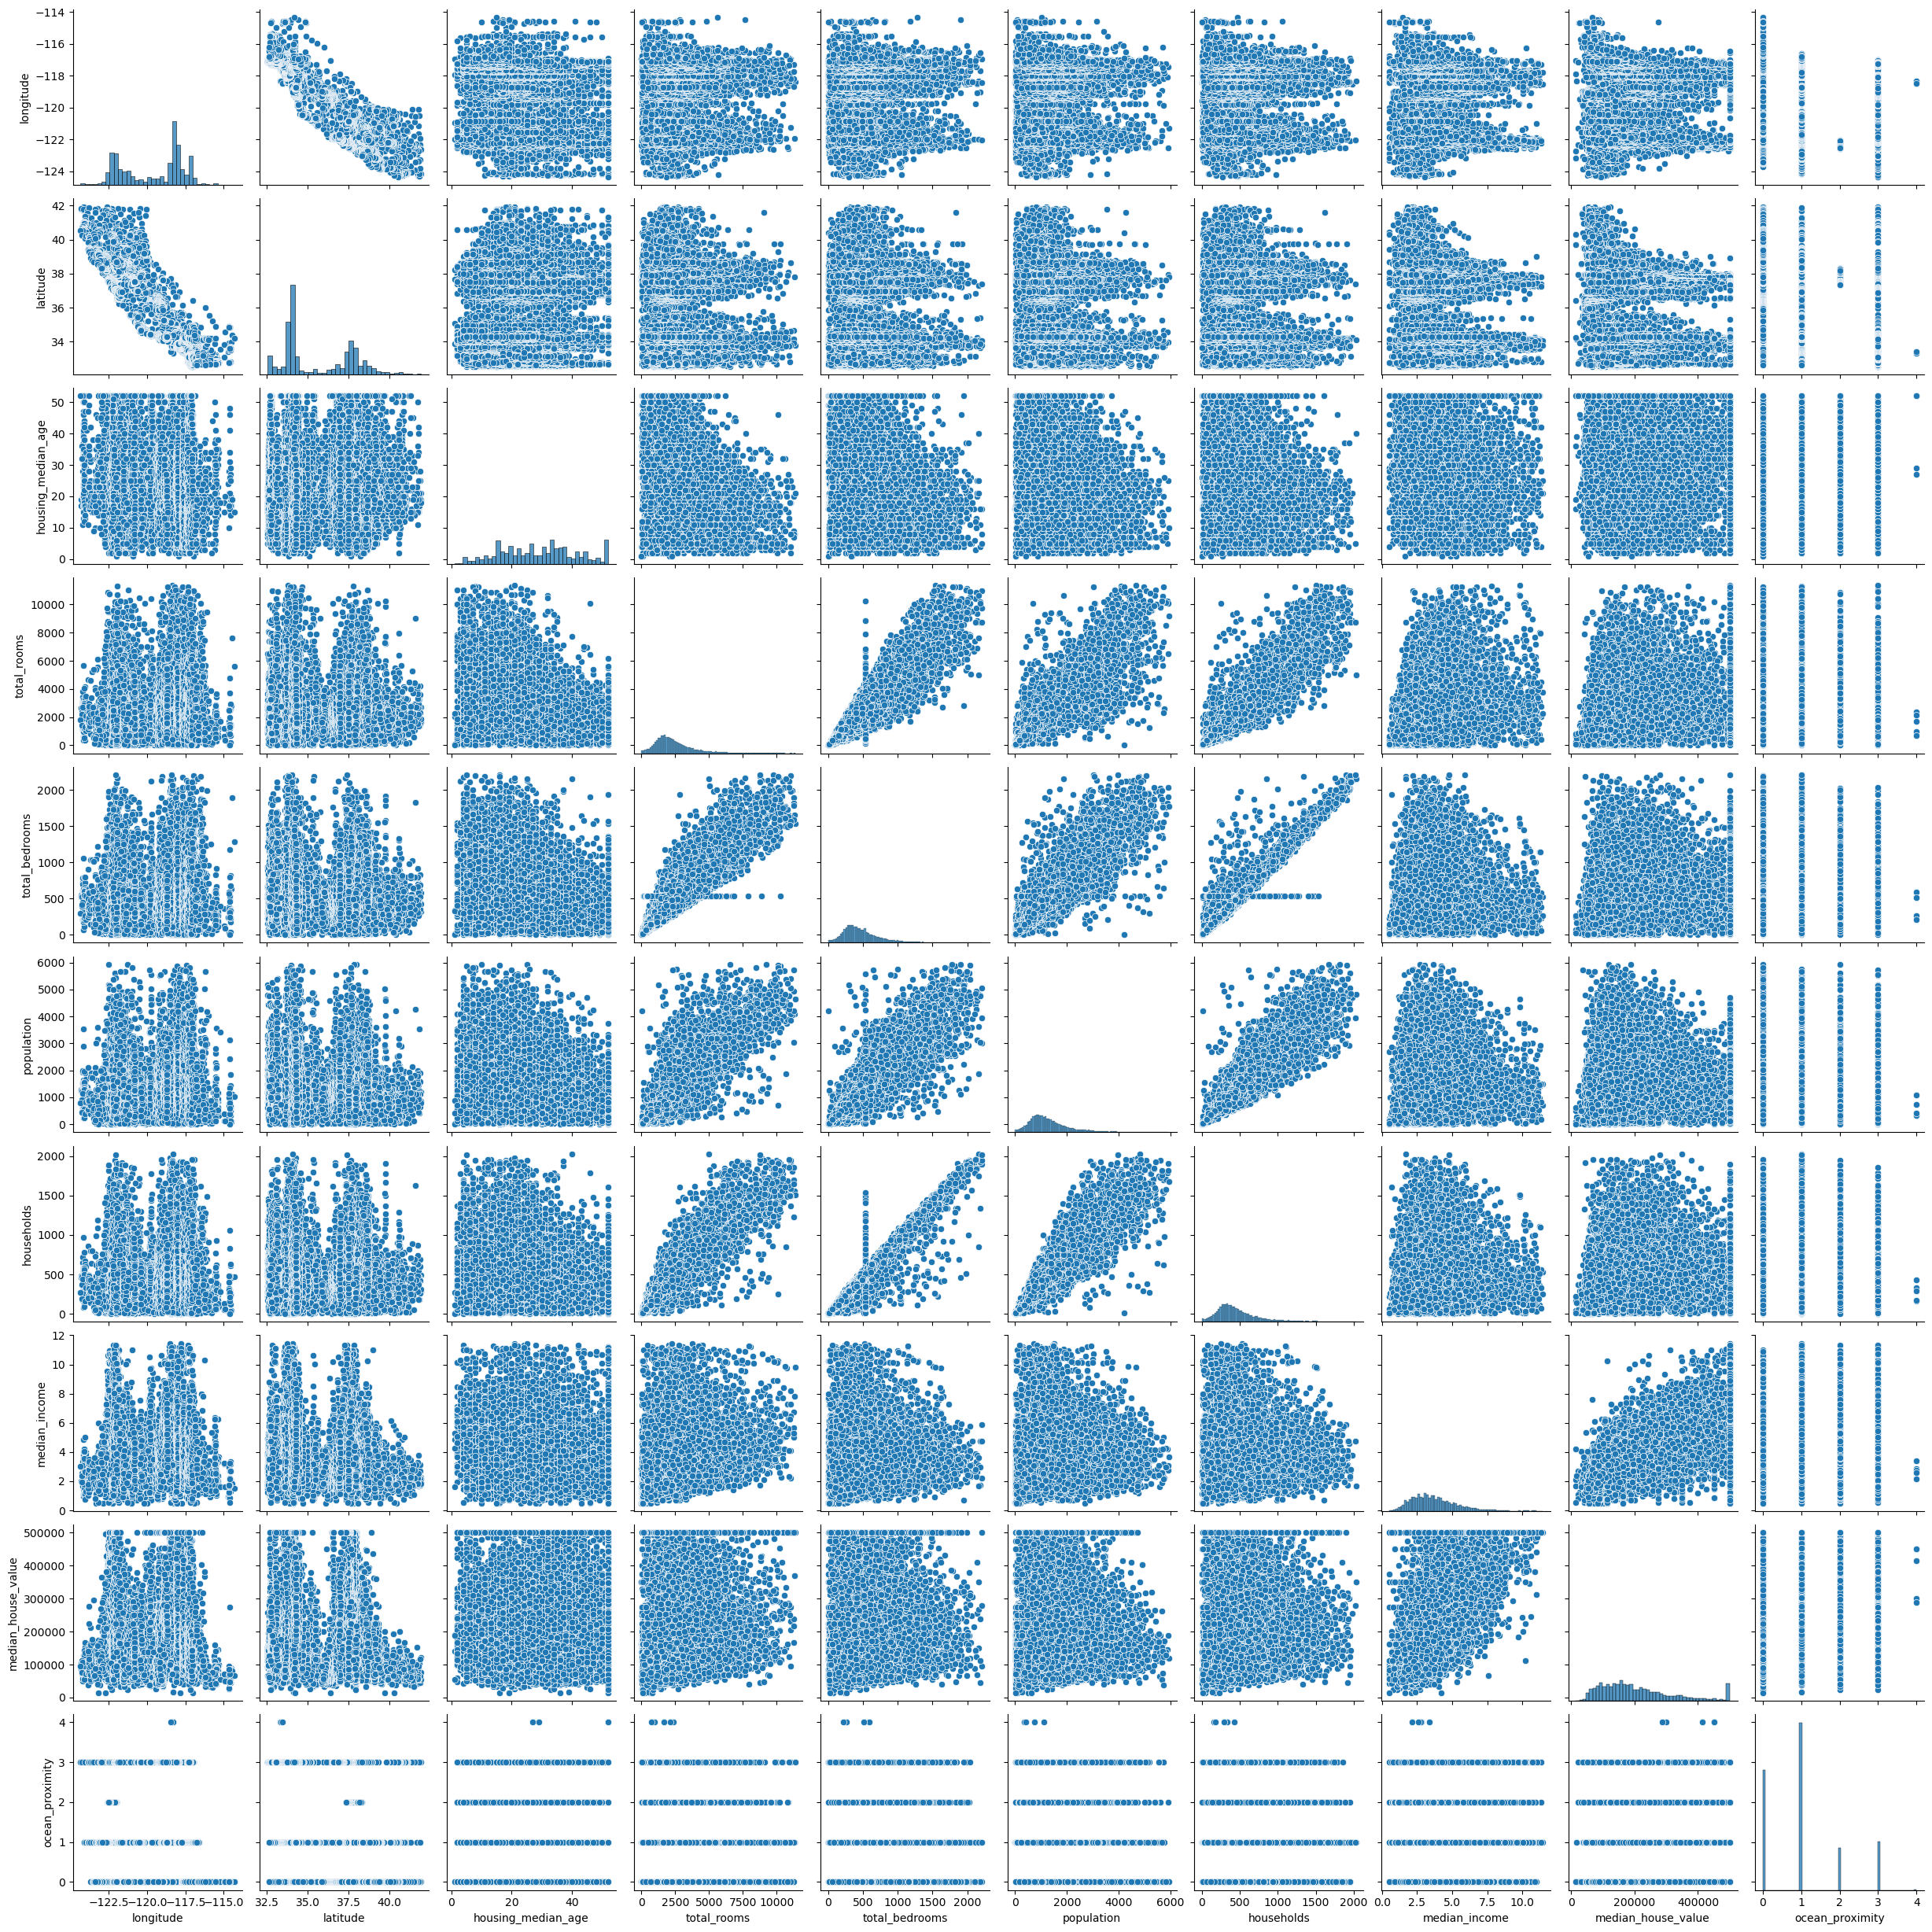

In [222]:
#We use plots to visualize the data for better analysis
sns.pairplot(clean_housing)

**Step 4 (Modeling)**

In [223]:
#We scale our data to bring everything down to one scale for better analysis
scaler = StandardScaler()

x = clean_housing.drop(['median_house_value'], axis=1)
y = clean_housing['median_house_value']

cols = x.columns

x = scaler.fit_transform(x) 

In [224]:
#We split our data for training and testing purposes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#Next, we train our Linear Regression model for the prediction of housing prices
lr = LinearRegression()
lr.fit(x_train, y_train)

predict = lr.predict(x_test)

**Step 5 (Evaluating the model)**

In [225]:
r2_score(y_test, predict)

0.6491046490315868

Although our r2 score is 65 which is low, we will go ahead and continue visualizing our predictions, since perhaps the low score can be due to insufficient data attributes

<AxesSubplot:xlabel='median_house_value'>

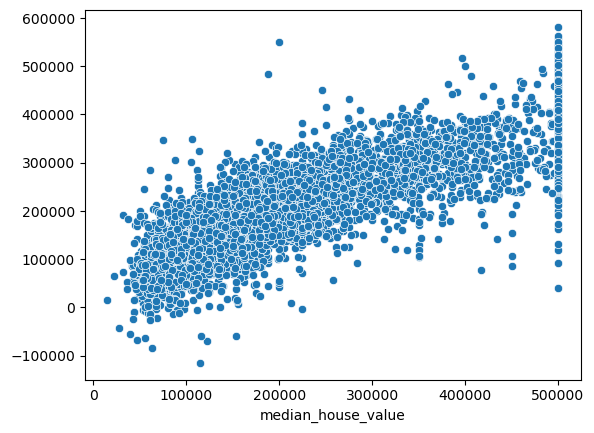

In [226]:
sns.scatterplot(x=y_test, y=predict)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

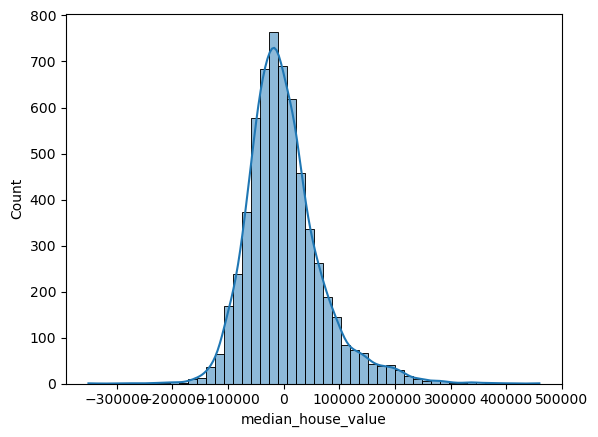

In [227]:
#Here we plot a histogram of the residuals, and since most of the residuals are around 0, that means most of our predictions are almost near to the real values
#Hence, this is a good model
sns.histplot((y_test - predict), bins=50, kde=True)

In [228]:
#We should also observe the coefficients that were calculated during the Linear Regression
cdf = pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients', ascending=False)
cdf

coefficients
median_income       77039.461813
total_bedrooms      41995.670899
households          31872.387173
housing_median_age  14678.904203
ocean_proximity      8021.091809
total_rooms        -24029.547329
population         -45511.239049
longitude          -66828.720082
latitude           -72432.334413

The insights from the above coefficients is that 1 unit increase in the median income will lead to an increase of $77039.46 in the price of the house, assuming all other factors are kept constant.